# Restaurant Data Analysis

This project analyzes a restaurant dataset contained in "Restaurant.xlsx". The dataset likely includes information about restaurant names, locations, cuisines, prices, ratings, and other attributes relevant to food and hospitality. The primary aim is to extract useful insights and patterns relating to restaurant operations, customer preferences, and performance indicators.

File Name    :  Restaurant.xlsx

Data Source  :  https://drive.google.com/file/d/1rGhBGoFJNWQ1HkFQLh06gIHZA7HaDtI7/view?usp=drive_link

# Data Exploration

## Importing required Python Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [8]:
Restaurant = pd.read_excel("C:/Users/admin/Desktop/Cognifyz/Restaurant.xlsx")      # Load Dataset

### First View of Data

In [10]:
Restaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Introducing Columns

**Restaurant ID:** *Unique identification number for each restaurant.*

**Restaurant Name:** *The name of the restaurant.*

**Country Code:** *Numeric code representing the country where the restaurant is located.*

**City:** *The city where the restaurant is located.*

**Address:** *Full street address of the restaurant.*

**Locality:** *Specific area or neighborhood within the city.*

**Locality Verbose:** *A more detailed description of the locality, often including additional region info.*

**Longitude:** *Geographic coordinate specifying the east-west position (helps locate the restaurant on a map).*

**Latitude:** *Geographic coordinate specifying the north-south position (helps locate the restaurant on a map).*

**Cuisines:** *List of types of food served at the restaurant (e.g., Italian, Chinese, Desserts).*

**Average Cost for two:** *Approximate cost for two people dining at the restaurant.*

**Currency:** *The currency in which the cost is given (e.g., INR for Indian Rupee).*

**Has Table booking:** *Indicates if the restaurant offers table booking ("Yes"/"No").*

**Has Online delivery:** *Indicates if online food delivery is available ("Yes"/"No").*

**Is delivering now:** *Shows if the restaurant is currently delivering ("Yes"/"No").*

**Switch to order menu:** *A menu option indicator, not always relevant in analysis.*

**Price range:** *Graded scale showing price category (often 1 to 4 or similar).*

**Aggregate rating:** *Overall rating of the restaurant (e.g., 4.5 out of 5).*

**Rating color:** *Visual color code corresponding to rating (e.g., Green for high, Red for low).*

**Rating text:** *Text description of rating (e.g., Excellent, Good, Poor).*

**Votes:** *Number of customers who reviewed or voted for the restaurant.*

### Checking number of rows and columns dataset has

In [14]:
print("Number of Rows Dataset has\t:\t", Restaurant.shape[0])
print("Number of Columns Dataset has\t:\t", Restaurant.shape[1])

Number of Rows Dataset has	:	 9551
Number of Columns Dataset has	:	 21


### Summery of DataFreame

In [16]:
Restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Checking Duplicates in Dataset

In [18]:
Duplicates = Restaurant.duplicated(keep = False).sum()
print("Number of Duplicate rows are : " , Duplicates)

Number of Duplicate rows are :  0


### Handeling NULL Values

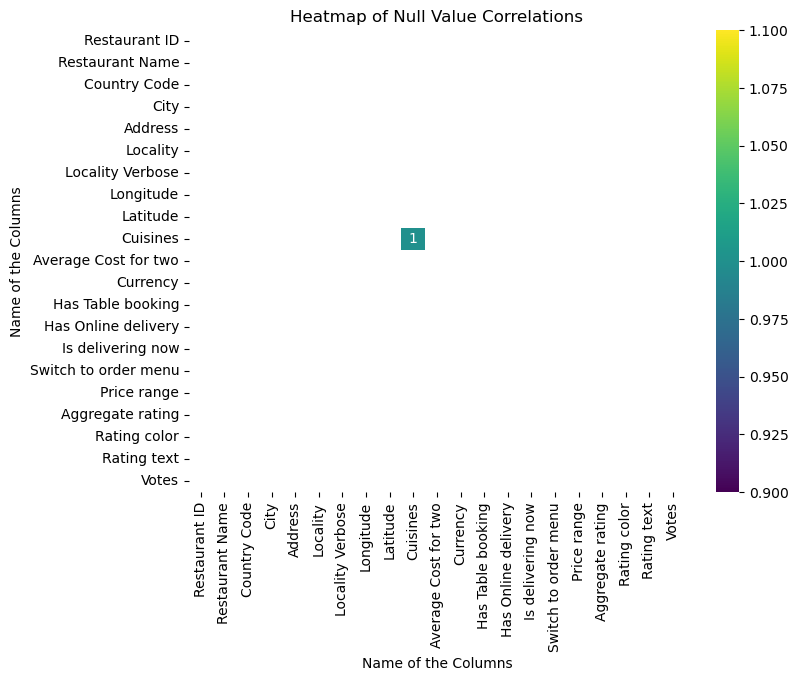

In [20]:
# Checking Missing Values using Heatmap

plt.figure(figsize = (8, 6))

sns.heatmap(Restaurant.isnull().corr(), annot = True, cmap = 'viridis')

plt.title('Heatmap of Null Value Correlations')
plt.xlabel("Name of the Columns", fontsize = 10)
plt.ylabel("Name of the Columns", fontsize = 10)

plt.show()

In [21]:
# Checking how many NULL Values Cuisines Column has

Restaurant['Cuisines'].isnull().sum()

9

In [22]:
Restaurant = Restaurant.dropna(subset=['Cuisines'])

In [23]:
Restaurant['Cuisines'].isnull().sum()

0

### Descriptive Statistics Summery

In [24]:
Restaurant.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [25]:
# Cuisines column has low number of missing values that why i dicided to drop them from data set
# Splitting Cuisines column by comma as there

Explode = Restaurant['Cuisines'].str.split(', ').explode()

In [26]:
# Count the number of restaurants per country code

Country_Code_Counts = Restaurant['Country Code'].value_counts().sort_values(ascending = False)

# Create a DataFrame (table)

Country_Code_Table = Country_Code_Counts.reset_index()
Country_Code_Table.columns = ['Country Code', 'Number of Restaurants']

# Display the table

Country_Code_Table

,Country Code,Number of Restaurants
0,1,8652
1,216,425
2,215,80
3,30,60
4,214,60
5,189,60
6,148,40
7,208,34
8,14,24
9,162,22


In [27]:
# Count the number of restaurants per city

City_Counts = Restaurant['City'].value_counts().sort_values(ascending = False)

# # Create a DataFrame table

City_Counts_Table = City_Counts.reset_index()
City_Counts_Table.columns = ['City', 'Number of Restaurants']

# Display as a regular table

City_Counts_Table

,City,Number of Restaurants
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
...,...,...
135,Forrest,1
136,Yorkton,1
137,Winchester Bay,1
138,Huskisson,1


# Level 1

## Task 1 : Top Cuisines

The restaurant industry features a remarkable diversity of cuisines, reflecting consumer preferences and cultural trends in any region. Understanding which cuisines are most commonly offered provides valuable insights for restaurant owners, marketers, and business analysts looking to identify popular food trends and target customer segments more effectively.

In this task, our objective is to determine the top three most common cuisines represented in the dataset. Further, we will calculate the percentage of restaurants that serve each of these leading cuisines. This analysis will help highlight prevailing culinary options in the market and guide data-driven decisions in menu planning, marketing strategies, and competitive benchmarking.

### Task 1.1 Determine the top three most common cuisines in the dataset.
### Task 1.2 Calculate the percentage of restaurants that serve each of the top cuisines.

In [32]:
# Top 3 most common cuisine types in dataset.

Top_Cuisines = Explode.value_counts().head(3)

# Percentage calculation of top 3 Cuisine count

Top_Cuisines_Percentage = (Top_Cuisines / len(Explode)) * 100
Percentage_str = Top_Cuisines_Percentage.round(2).astype(str) + '%'

# Creating table

Top_Cuisines_Table = pd.DataFrame({
    'Cuisines': Top_Cuisines.index,
    'Count': Top_Cuisines.values,
    'Percentage': Percentage_str.values
})

Top_Cuisines_Table

,Cuisines,Count,Percentage
0,North Indian,3960,20.09%
1,Chinese,2735,13.88%
2,Fast Food,1986,10.08%


### Task : 2 City Analysis

The geographic distribution of restaurants and their quality can reveal crucial patterns about regional food markets and consumer preferences. By analyzing city-level data, businesses can identify urban centers that serve as key dining hubs, assess overall customer satisfaction within each city, and pinpoint areas recognized for exceptional dining experiences.

In this task, we will identify the city with the highest number of restaurants in the dataset, calculate the average restaurant rating for each city, and determine which city boasts the highest average rating. This city-wise analysis supports informed business expansion decisions, helps restaurant owners benchmark their performance against regional leaders, and uncovers opportunities for delivering enhanced dining value in target locations.

### Task 2.1 Identify the city with the highest number of restaurants in the dataset

In [36]:
Top_City = Restaurant['City'].mode().iloc[0]
Top_Count = (Restaurant['City'] == Top_City).sum()

print("\n" , Top_City , "is the city with Highest number" , Top_Count , "Restaurants\n")


 New Delhi is the city with Highest number 5473 Restaurants



### Task 2.2 Calculate the average rating for restaurants in each city.

In [38]:
City_AVG_Rating = Restaurant.groupby('City')['Aggregate rating'].mean().round(2)
City_AVG_Rating = City_AVG_Rating.sort_values(ascending = False)

# Create a table (DataFrame) with City and Average Rating columns

City_AVG_Rating_Table = City_AVG_Rating.reset_index()
City_AVG_Rating_Table.columns = ['City', 'Average Rating']

# Display the table
City_AVG_Rating_Table

,City,Average Rating
0,Inner City,4.90
1,Quezon City,4.80
2,Makati City,4.65
3,Pasig City,4.63
4,Mandaluyong City,4.62
...,...,...
135,New Delhi,2.44
136,Montville,2.40
137,Mc Millan,2.40
138,Noida,2.04


### Task  2.3 Determine the city with the highest average rating

In [40]:
# Sort cities by average rating in descending order

Sorted_AVG_Ratings = Restaurant['Aggregate rating'].sort_values(ascending = False)

# The city with the highest average rating

Highest_AVG_Rating_City = Sorted_AVG_Ratings.index[0]
Highest_AVG_Rating = Sorted_AVG_Ratings.iloc[0]

print("\n The City with Highest Average Rating" , Highest_AVG_Rating_City , "With an Average Rating of" , Highest_AVG_Rating , "\n")


 The City with Highest Average Rating 1381 With an Average Rating of 4.9 



### Task : 3 Price Range Distribution

Understanding the distribution of restaurant price ranges provides valuable insights into market segmentation and consumer accessibility. By analyzing how restaurants are positioned across different pricing categories, businesses can better assess competitive landscape, identify predominant market tiers, and recognize opportunities to optimize their pricing strategies.

In this task, we will visualize the distribution of price ranges among the restaurants using a histogram or bar chart and calculate the percentage of restaurants within each price category. This analysis helps stakeholders comprehend affordability trends, highlight target markets, and make informed decisions regarding pricing and service positioning.

### Task : 3.1 Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [44]:
# Count restaurants in each price range
Price_Counts = Restaurant['Price range'].value_counts().sort_index()

# Create a DataFrame table with Price Range and Restaurant Count columns
Price_Counts_Table = Price_Counts.reset_index()
Price_Counts_Table.columns = ['Price Range', 'Restaurant Count']

# Display the table
Price_Counts_Table

,Price Range,Restaurant Count
0,1,4438
1,2,3113
2,3,1405
3,4,586


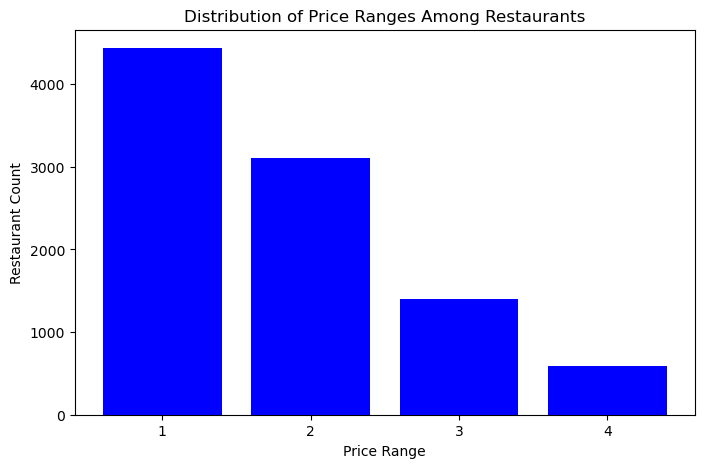

In [46]:
# Plotting the bar chart using your table

plt.figure(figsize = (8, 5))

plt.bar(Price_Counts_Table['Price Range'].astype(str), Price_Counts_Table['Restaurant Count'], color = 'blue')

plt.xlabel('Price Range')
plt.ylabel('Restaurant Count')
plt.title('Distribution of Price Ranges Among Restaurants')

plt.show()

### Understanding 

Most of the Restaurants from dataset are in the afforable and slightly high price range

### Task : 3.2 Calculate the percentage of restaurants in each price range category.

In [85]:
# Count number of restaurants in each price range

Price_Counts = Restaurant['Price range'].value_counts().sort_index()

# Calculate percentages (rounded to 2 decimals)

Price_Percentages = (Price_Counts / Price_Counts.sum() * 100).round(2)
Percentage_str = Price_Percentages.astype(str) + '%'

# Create the DataFrame table

Price_Percentages_Table = pd.DataFrame({
    'Price Range': Price_Counts.index,
    'Percentage of Restaurants': Percentage_str.values
})

# To view as a table (e.g. in Jupyter/Colab)

Price_Percentages_Table

,Price Range,Percentage of Restaurants
0,1,46.51%
1,2,32.62%
2,3,14.72%
3,4,6.14%


### Understanding

The majority of Restaurants fall into the Lowest Price Range (Price Range 1), with Decreasing Percentages as the Price Range Increases (Price Range 4 has the fewest Restaurants).

### Task : 4 Online Delivery

The rise of online delivery services has significantly transformed the restaurant industry, influencing customer expectations and shaping business models. Understanding how many restaurants offer online delivery, and its impact on restaurant ratings, provides valuable insights into service adoption trends and customer satisfaction dynamics.

In this task, we will determine the percentage of restaurants that provide online delivery and compare the average ratings of restaurants with and without this option. This analysis highlights the significance of online delivery in today’s market, helping businesses assess the potential benefits of offering delivery services and informing strategies to enhance customer experience and competitive positioning.

### Task : 4.1 Determine the percentage of restaurants that offer online delivery.

In [52]:
# Count total number of restaurants

Total_Restaurants = len(Restaurant)

# Count number of restaurants offering online delivery

Online_Delivery_Count = (Restaurant['Has Online delivery'] == 'Yes').sum()

# Calculate percentage (rounded to 2 decimal places)

Online_Delivery_Percentage = round((Online_Delivery_Count / Total_Restaurants) * 100, 2)

print("\nNumber of restaurants offering online delivery : " , Online_Delivery_Count)
print("Percentage of restaurants that offer online delivery : " , Online_Delivery_Percentage , "%\n")


Number of restaurants offering online delivery :  2451
Percentage of restaurants that offer online delivery :  25.69 %



### Understanding

One-Quarter of the Restaurants in the dataset offer online delivery, specifically 2,451 Restaurants which is 25.69% of the total.

### Task : 4.2 Compare the average ratings of restaurants with and without online delivery

In [54]:
# Get average ratings by online delivery status

AVG_Rating_By_Delivery = Restaurant.groupby('Has Online delivery')['Aggregate rating'].mean().round(2)

# Create a DataFrame table for clarity

AVG_Rating_By_Delivery_Table = AVG_Rating_By_Delivery.reset_index()
AVG_Rating_By_Delivery_Table.columns = ['Online Delivery', 'Average Rating']

# Display the table

AVG_Rating_By_Delivery_Table

,Online Delivery,Average Rating
0,No,2.46
1,Yes,3.25


### Understanding

From the table, Restaurants that offer Online Delivery have a Higher Average Rating than those that do not.

Average rating without online delivery: 2.46  
Average rating with online delivery: 3.25  

So, Customers Rate Restaurants with Online Delivery better on Average.

### Saving Dataset

In [80]:
import pickle
pickle.dump(Restaurant , open("Restaurant.pkl" , "wb"))

# Conclusion

This study examined a dataset of 9,551 restaurants from various cities and countries, which was cleaned to 9,542 records after removing missing values in the Cuisines column and confirming there were no duplicate entries. The work concentrated on key aspects of the restaurant landscape, including cuisine preferences, how restaurants are distributed across cities, pricing tiers, and the adoption of online delivery services.

The findings indicate that the dataset is largely composed of budget-friendly restaurants located in a handful of major cities, with cuisines such as North Indian, Chinese, and Fast Food appearing most frequently. There are clear differences between cities in both restaurant counts and average ratings, and restaurants that provide online delivery generally earn higher ratings, suggesting that convenience and service features play an important role in customer satisfaction.